In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [38]:
df = pd.read_csv('/content/house.csv')

In [39]:
# setting float format into only 0 decimals points:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [40]:
df

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26,1287,204,22,67,96005
1,1,35,1855,187,8,30,92474
2,1,37,692,111,24,24,98113
3,1,17,1399,238,1,66,92118
4,1,53,85,101,20,3,98977
...,...,...,...,...,...,...,...
4303,9,175,1300,218,2,5,102707
4304,6,215,1346,78,14,5,99695
4305,5,300,1585,236,3,5,93804
4306,1,29,1896,147,4,2,92915


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [42]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308,4308,4308,4308,4308,4308,4308
mean,4,119,1091,106,9,49,95701
std,2,95,555,61,8,28,3920
min,1,10,12,1,1,0,86114
25%,2,52,636,56,2,25,92934
50%,3,92,1143,101,8,48,95338
75%,5,151,1554,148,16,72,97981
max,17,751,2000,330,24,97,118135


In [43]:
df.isnull().sum()

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [44]:
df.duplicated().sum()

0

# Visualisations

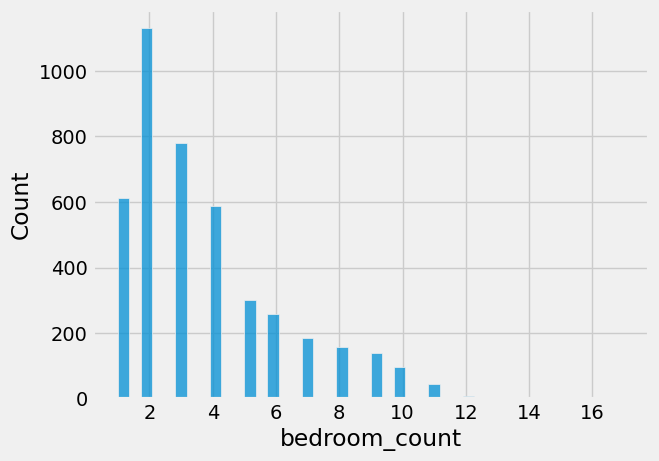

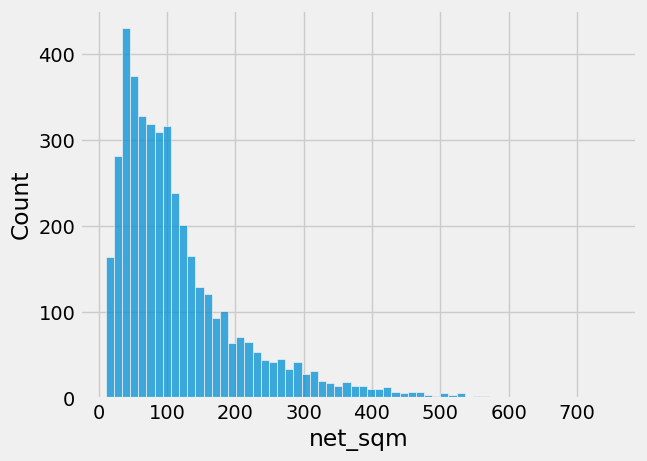

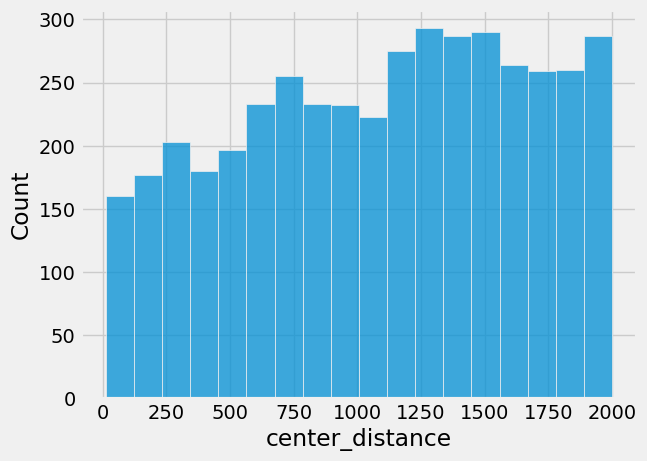

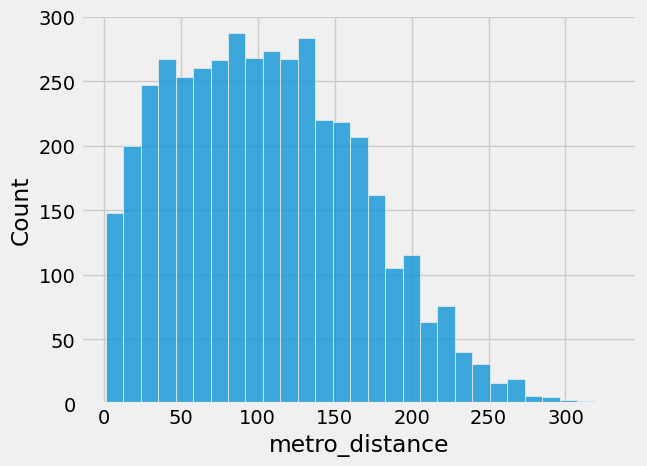

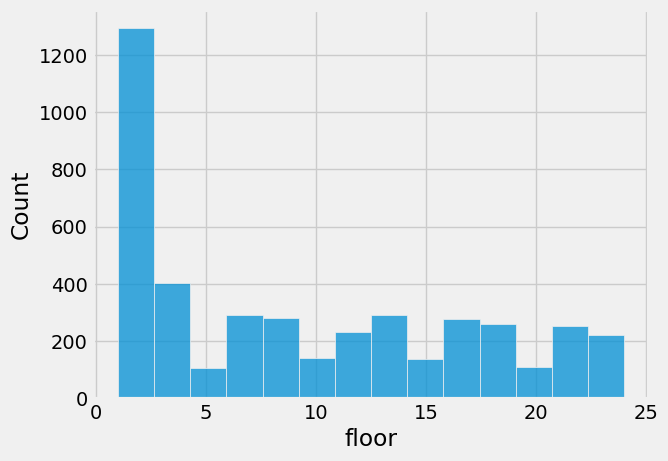

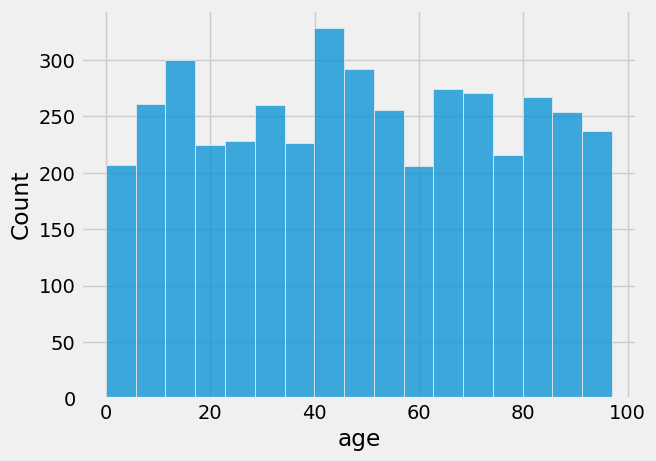

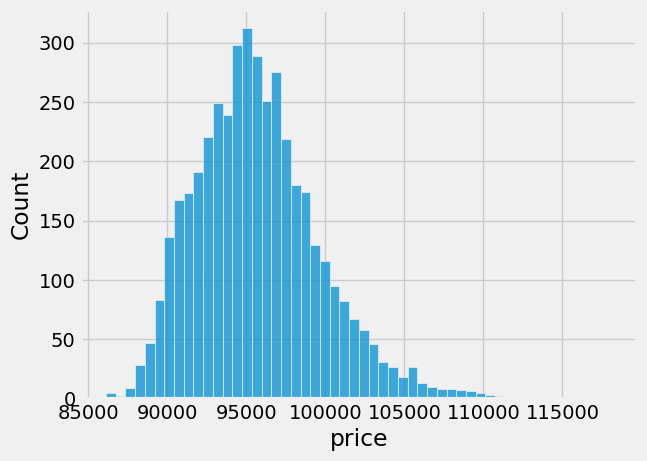

In [45]:
# histogram to understand the data distribution:
for i in df.select_dtypes(include = 'number').columns:
  sns.histplot(data = df, x = i)
  plt.show()

In [46]:
df['bedroom_count'].value_counts()

bedroom_count
2     1130
3      781
1      612
4      588
5      301
6      258
7      186
8      156
9      140
10      97
11      43
12       7
13       5
14       3
17       1
Name: count, dtype: int64

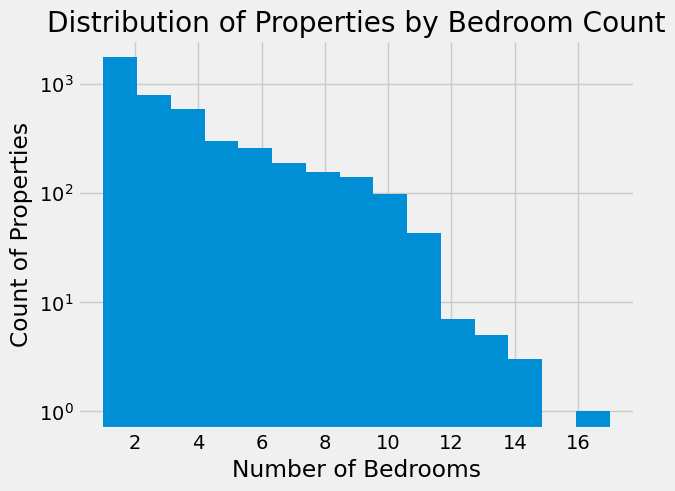

In [47]:
# ploting a histogram of bedroom_count:
plt.hist(df['bedroom_count'],bins=15,log=True)
plt.title('Distribution of Properties by Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count of Properties')
plt.show()

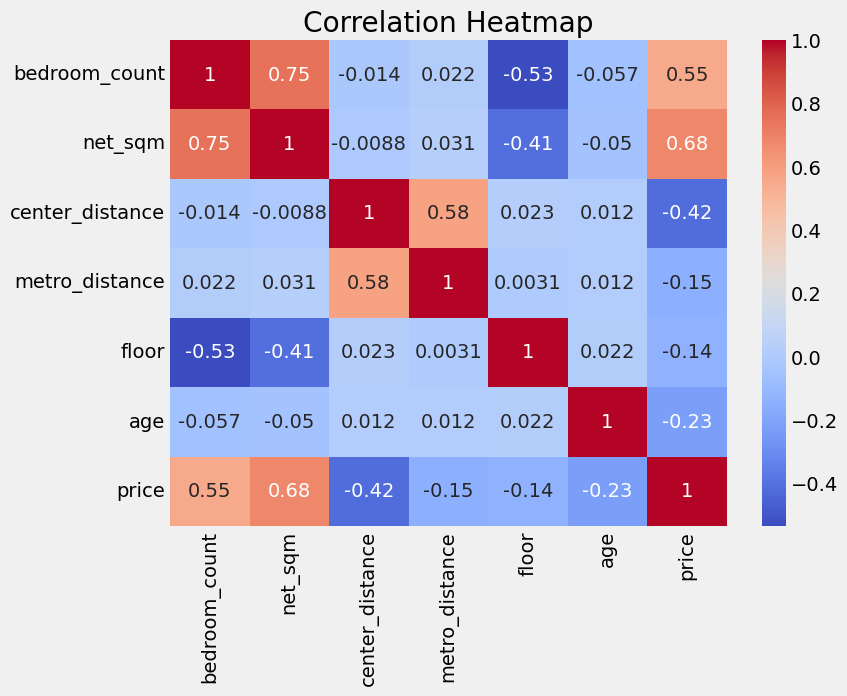

In [48]:
# Create a heatmap to show the correlation between different variables in the dataset:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

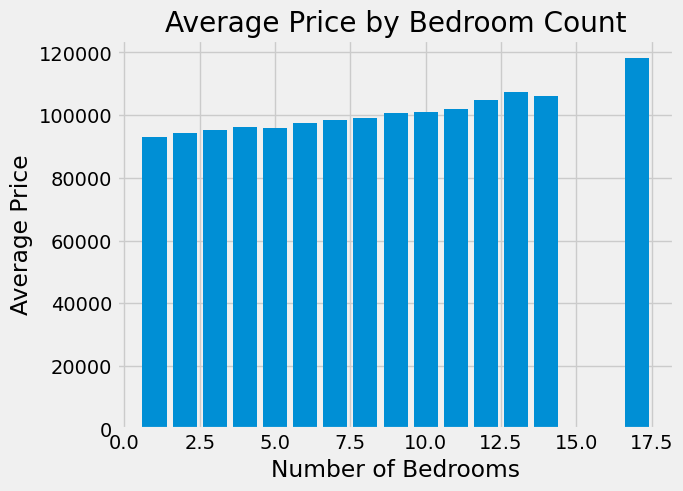

In [49]:
# Group the data by bedroom count and calculate the average price for each group:
grouped_data = df.groupby('bedroom_count')['price'].mean()

# Create the bar chart:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Bedroom Count')
plt.show()

In [50]:
# Create a new column to Calculate the price per square meter for each property:
df['Price_per_Sqm'] = df['price'] / df['net_sqm']

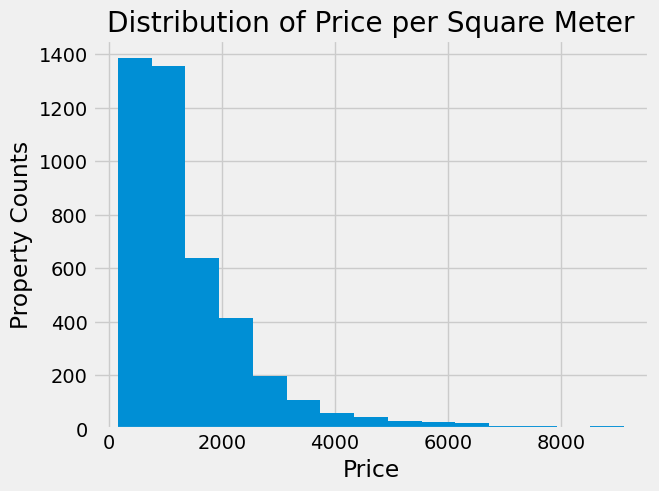

In [51]:
# Create a histogram of Price per Square Meter:

plt.hist(df['Price_per_Sqm'],bins=15)
plt.title('Distribution of Price per Square Meter')
plt.xlabel('Price')
plt.ylabel('Property Counts')
plt.show()

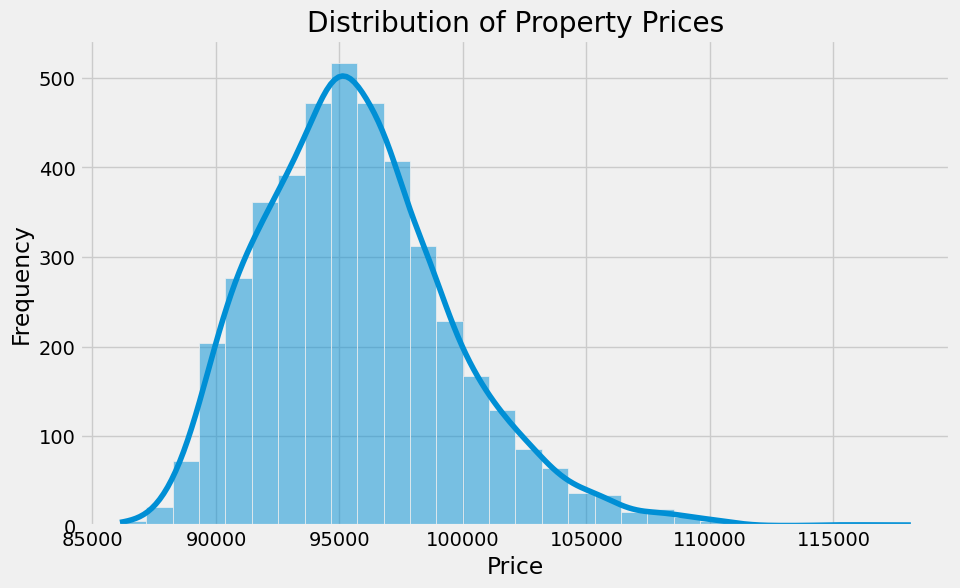

In [52]:
# Plot a histogram to show the distribution of property prices:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

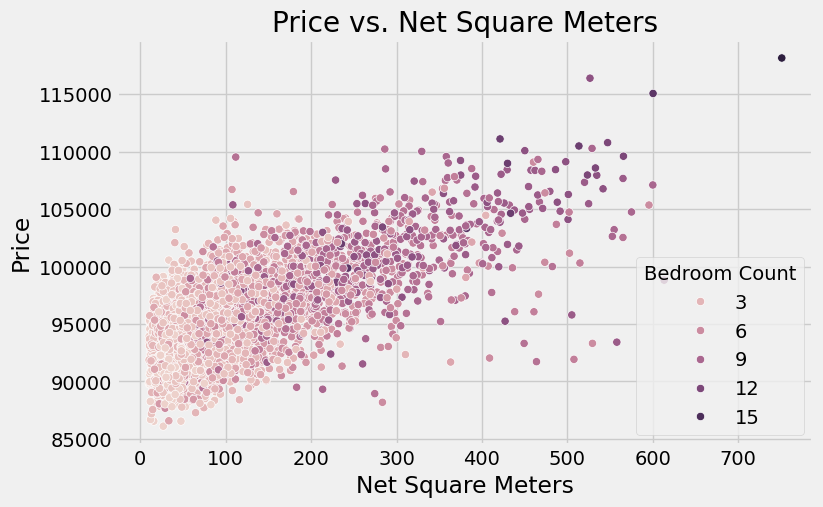

In [53]:
# Scatter Plot of Price vs. Net Square Meters:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='net_sqm', y='price', hue='bedroom_count')
plt.title('Price vs. Net Square Meters')
plt.xlabel('Net Square Meters')
plt.ylabel('Price')
plt.legend(title='Bedroom Count')
plt.show()

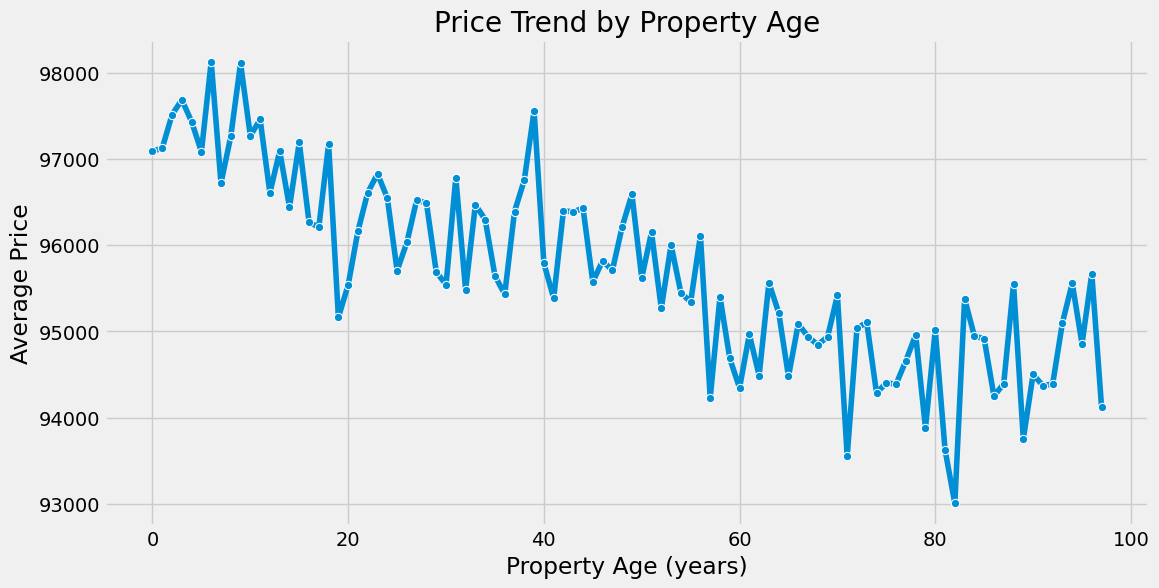

In [54]:
# Calculate the average price by property age:
avg_price_by_age = df.groupby('age')['price'].mean().reset_index()

# Plotting:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_age, x='age', y='price', marker='o')
plt.title('Price Trend by Property Age')
plt.xlabel('Property Age (years)')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

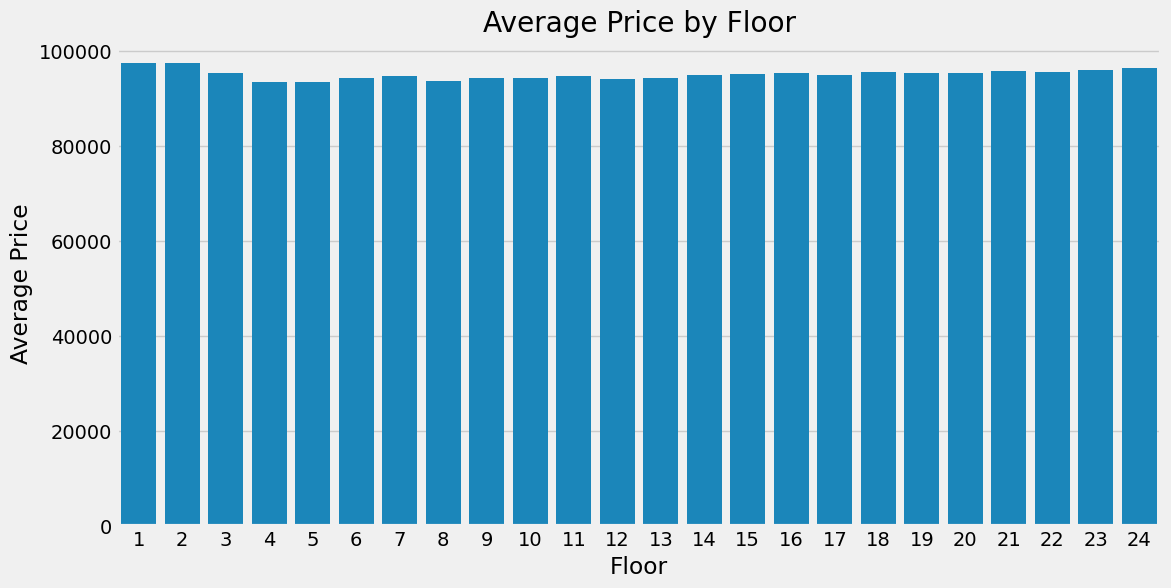

In [55]:
# Calculate the average price by floor:
avg_price_by_floor = df.groupby('floor')['price'].mean().reset_index()

# Plotting:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_floor, x='floor', y='price')
plt.title('Average Price by Floor')
plt.xlabel('Floor')
plt.ylabel('Average Price')
plt.show()

In [56]:
# Define bins and labels for center distance ranges
bins = np.arange(1, 2200, 200)
labels = [f'{i}-{i+199}' for i in bins[:-1]]

# Create the 'center_distance_range' column
df['center_distance_range'] = pd.cut(df['center_distance'], bins=bins, labels=labels, right=False)

In [57]:
df['center_distance_range'].value_counts()

center_distance_range
1201-1400    525
1401-1600    518
1801-2000    495
1601-1800    473
601-800      458
1001-1200    438
801-1000     413
201-400      353
401-600      345
1-200        290
Name: count, dtype: int64

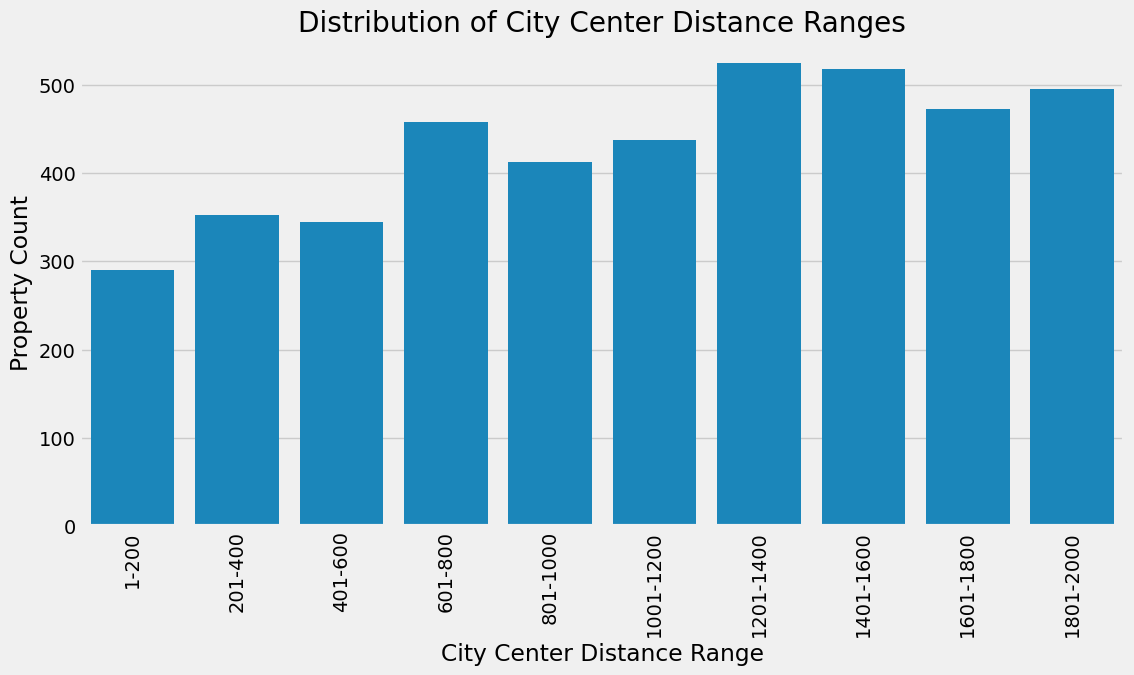

In [58]:
# Get the value counts and sort by index (which is the range labels)
ordered_counts = df['center_distance_range'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=ordered_counts.index, y=ordered_counts.values)
plt.title('Distribution of City Center Distance Ranges')
plt.xlabel('City Center Distance Range')
plt.ylabel('Property Count')
plt.xticks(rotation=90)
plt.show()

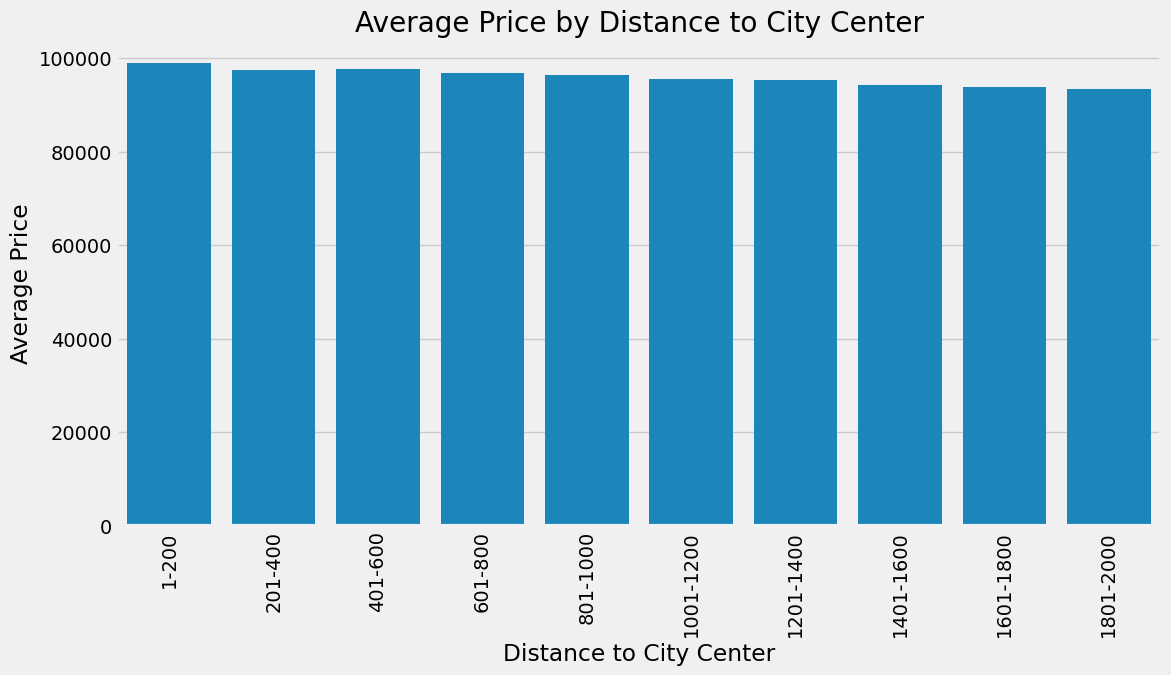

In [59]:
# Calculate the average price by distance to city center
avg_price_by_center_distance = df.groupby('center_distance_range')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_center_distance, x='center_distance_range', y='price')
plt.title('Average Price by Distance to City Center')
plt.xlabel('Distance to City Center')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

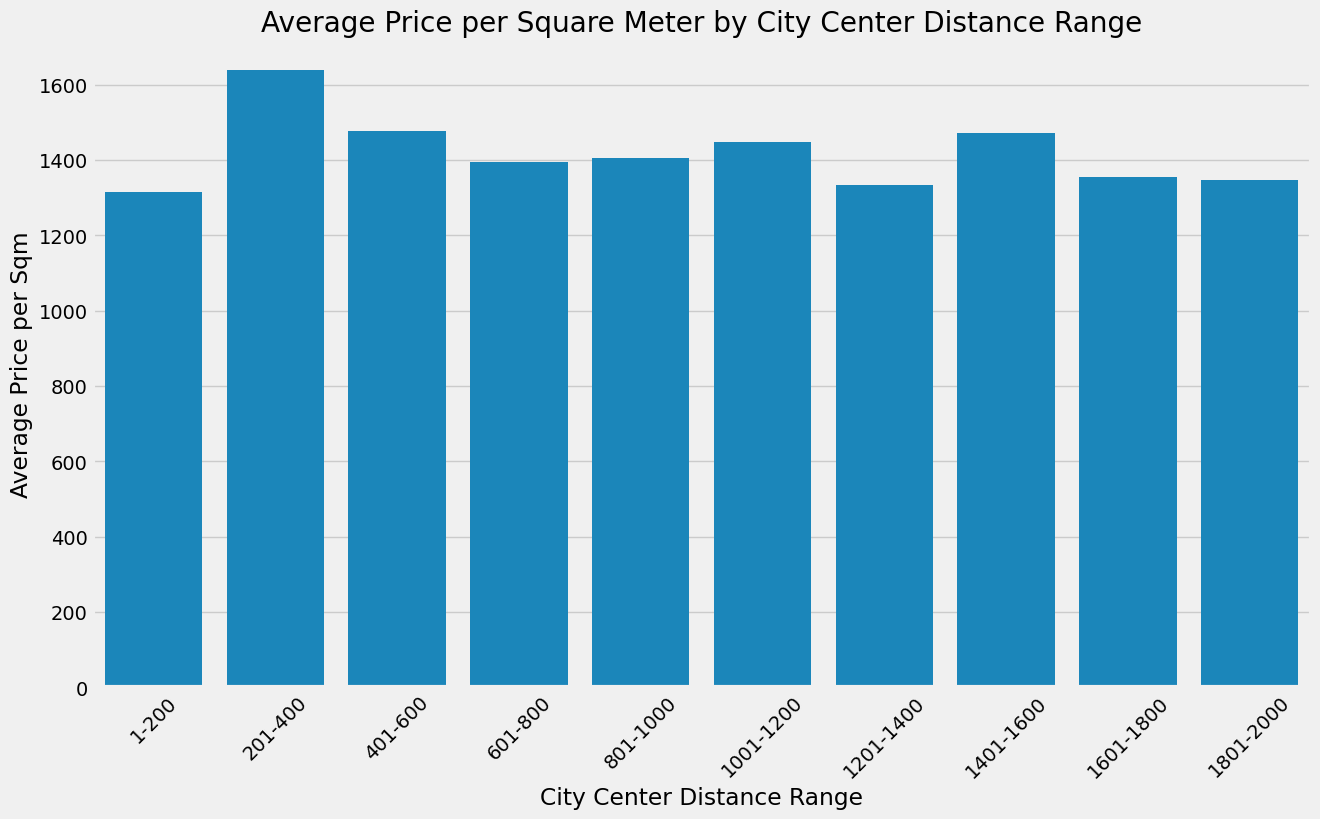

In [60]:
# Calculate the average price per square meter by center distance range
avg_price_per_sqm_by_center_distance = df.groupby('center_distance_range')['Price_per_Sqm'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_per_sqm_by_center_distance, x='center_distance_range', y='Price_per_Sqm')
plt.title('Average Price per Square Meter by City Center Distance Range')
plt.xlabel('City Center Distance Range')
plt.ylabel('Average Price per Sqm')
plt.xticks(rotation=45)
plt.show()

In [61]:
# Define bins and labels for metro distance ranges
bins = np.arange(1, 400, 50)
labels = [f'{i}-{i+49}' for i in bins[:-1]]

# Create the 'center_distance_range' column
df['metro_distance_range'] = pd.cut(df['metro_distance'], bins=bins, labels=labels, right=False)

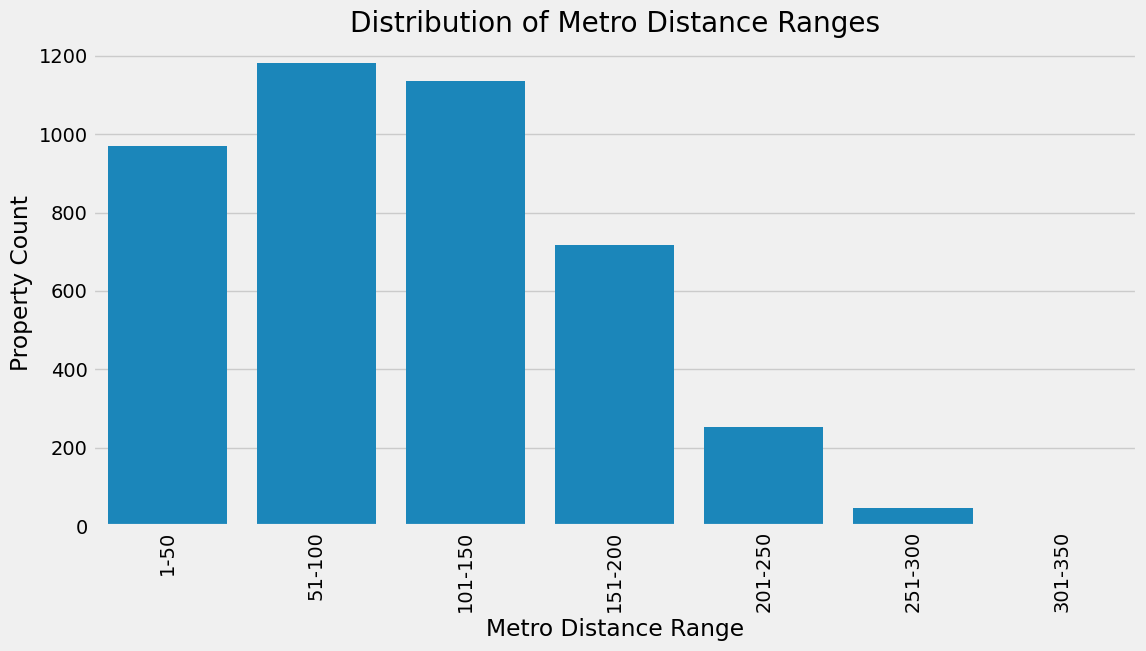

In [62]:
# Get the value counts and sort by index (which is the range labels)
ordered_counts = df['metro_distance_range'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=ordered_counts.index, y=ordered_counts.values)
plt.title('Distribution of Metro Distance Ranges')
plt.xlabel('Metro Distance Range')
plt.ylabel('Property Count')
plt.xticks(rotation=90)
plt.show()

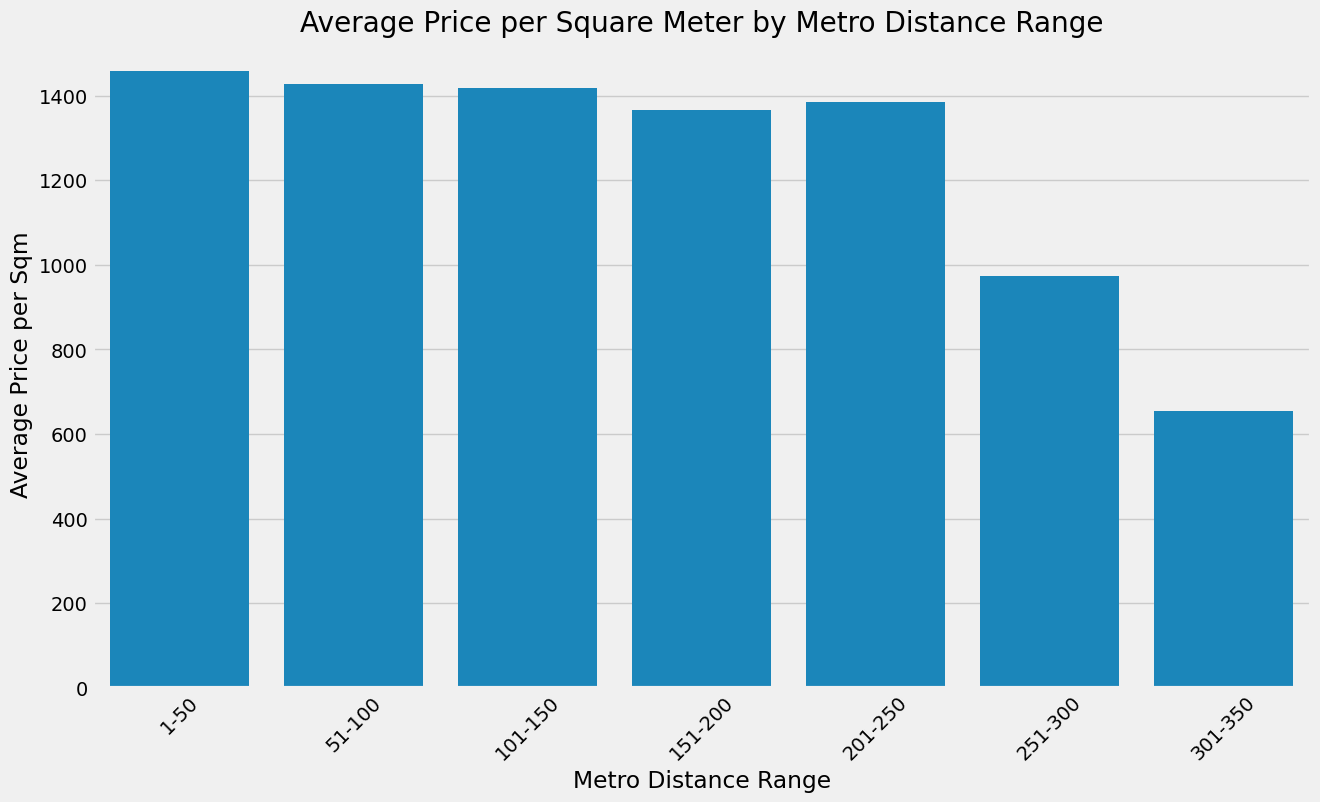

In [63]:
# Calculate the average price per square meter by Metro distance range
avg_price_per_sqm_by_center_distance = df.groupby('metro_distance_range')['Price_per_Sqm'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_per_sqm_by_center_distance, x='metro_distance_range', y='Price_per_Sqm')
plt.title('Average Price per Square Meter by Metro Distance Range')
plt.xlabel('Metro Distance Range')
plt.ylabel('Average Price per Sqm')
plt.xticks(rotation=45)
plt.show()

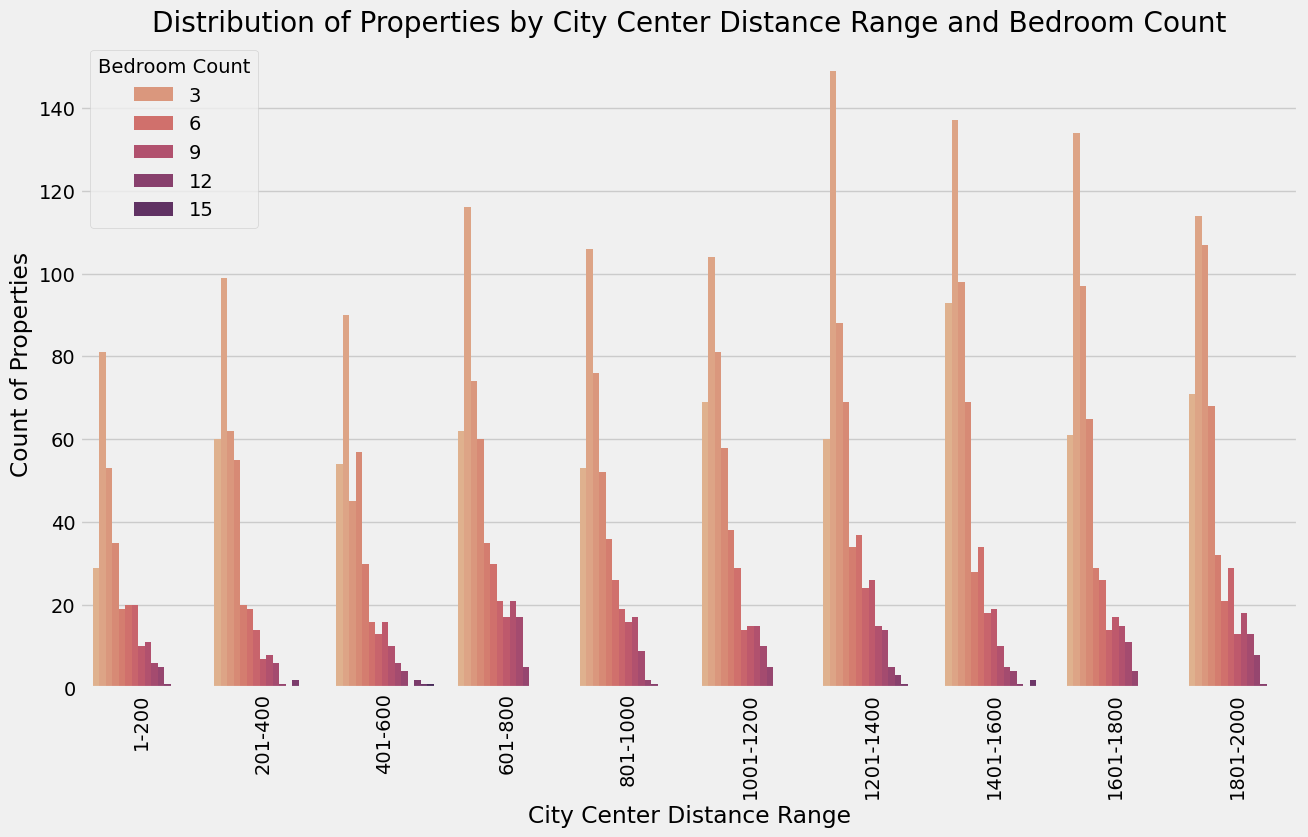

In [64]:
# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='center_distance_range', hue='bedroom_count', palette='flare')
plt.title('Distribution of Properties by City Center Distance Range and Bedroom Count')
plt.xlabel('City Center Distance Range')
plt.ylabel('Count of Properties')
plt.legend(title='Bedroom Count', loc='upper left')
plt.xticks(rotation=90)
plt.show()

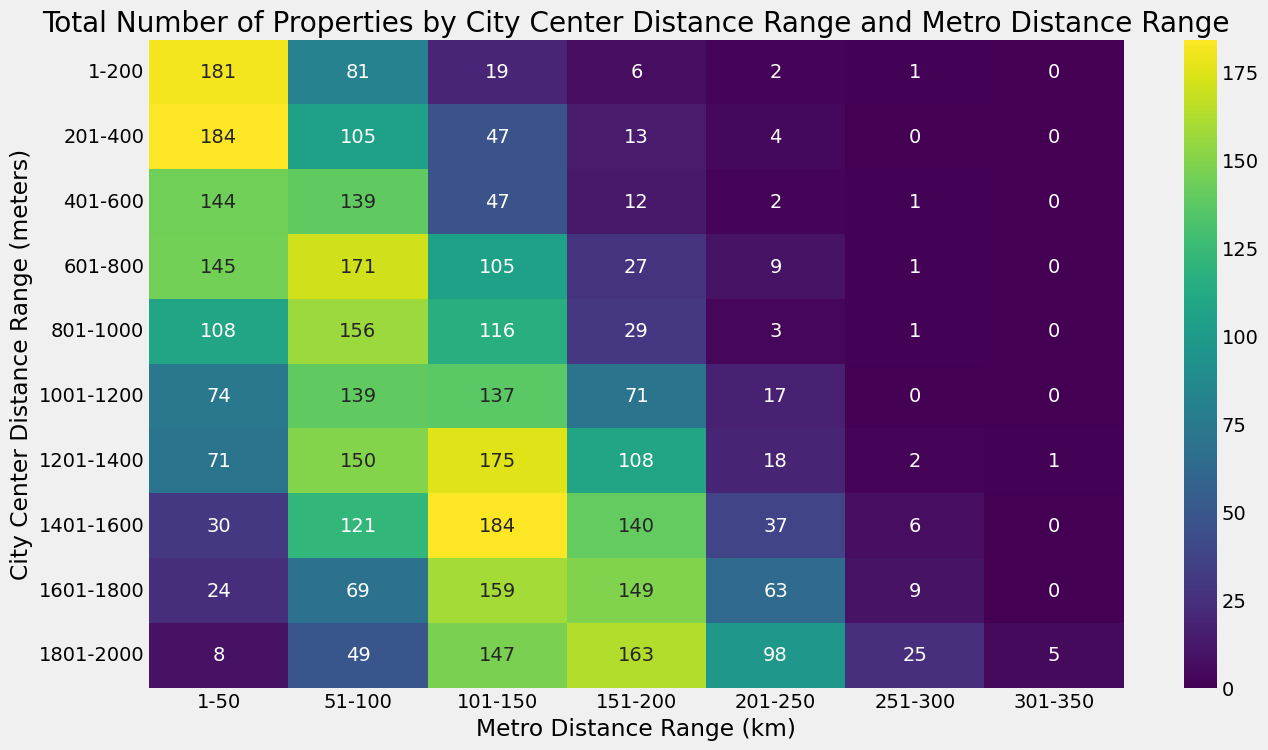

In [65]:
# Pivot the data to create a heatmap
pivot_table = df.pivot_table(index='center_distance_range', columns='metro_distance_range', values='bedroom_count', aggfunc='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Total Number of Properties by City Center Distance Range and Metro Distance Range')
plt.xlabel('Metro Distance Range (km)')
plt.ylabel('City Center Distance Range (meters)')
plt.show()
